In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("C:/Users/Administrator/Downloads/netflix_titles.csv.zip")

# Check first few rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
# Get column names and types
df.info()

# Basic stats
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,6.234000e+03,6234,6234,4265,5664,5758,6223,6234.00000,6224,6234,6234,6234
unique,NaN,2,6172,3301,5469,554,1524,NaN,14,201,461,6226
top,NaN,Movie,The Silence,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,NaN,4265,3,18,18,2032,122,NaN,2027,1321,299,3
mean,7.670368e+07,NaN,NaN,NaN,NaN,NaN,NaN,2013.35932,NaN,NaN,NaN,NaN
std,1.094296e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.81162,NaN,NaN,NaN,NaN
min,2.477470e+05,NaN,NaN,NaN,NaN,NaN,NaN,1925.00000,NaN,NaN,NaN,NaN
25%,8.003580e+07,NaN,NaN,NaN,NaN,NaN,NaN,2013.00000,NaN,NaN,NaN,NaN
50%,8.016337e+07,NaN,NaN,NaN,NaN,NaN,NaN,2016.00000,NaN,NaN,NaN,NaN
75%,8.024489e+07,NaN,NaN,NaN,NaN,NaN,NaN,2018.00000,NaN,NaN,NaN,NaN


In [4]:
# Check for missing values
df.isnull().sum()

# Handle nulls
df['country'].fillna("Unknown", inplace=True)
df['cast'].fillna("Not Available", inplace=True)
df['director'].fillna("Not Available", inplace=True)

# Drop unnecessary columns if needed
df.drop_duplicates(inplace=True)

Text(0.5, 1.0, 'Distribution of Content Type')

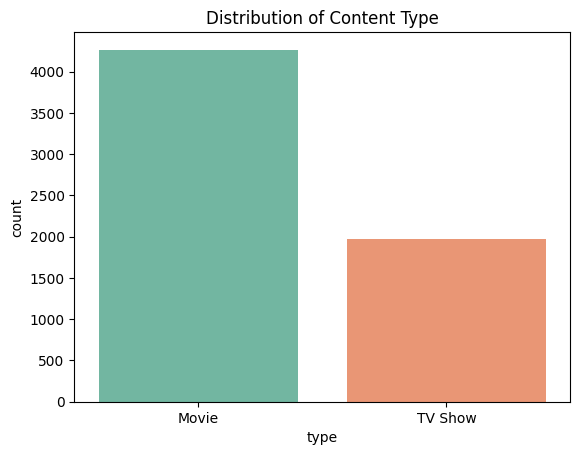

In [5]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Distribution of Content Type")

Text(0.5, 1.0, 'Content Released Over the Years')

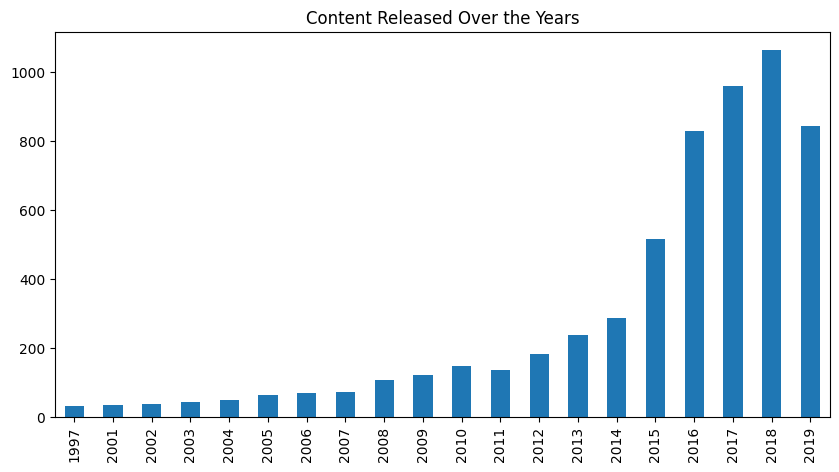

In [6]:
df['release_year'].value_counts().head(20).sort_index().plot(kind='bar', figsize=(10,5))
plt.title("Content Released Over the Years")


Text(0.5, 1.0, 'Top Ratings on Netflix')

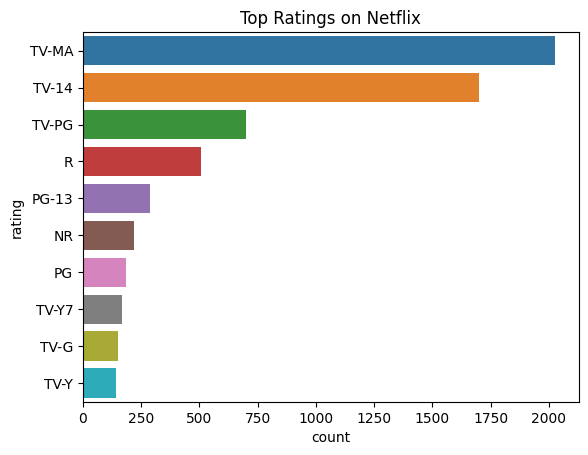

In [7]:
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index[:10])
plt.title("Top Ratings on Netflix")


Text(0.5, 1.0, 'Top 10 Genres')

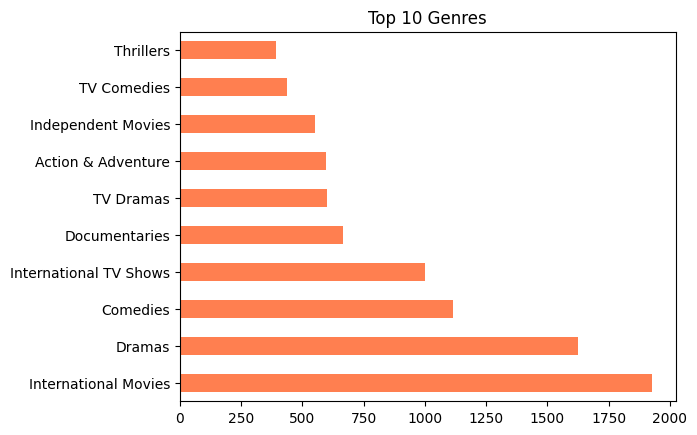

In [8]:
# Split genres
from collections import Counter
genres = df['listed_in'].dropna().apply(lambda x: x.split(', '))
flat_genres = [genre for sublist in genres for genre in sublist]
genre_counts = pd.Series(Counter(flat_genres)).sort_values(ascending=False)

# Plot
genre_counts.head(10).plot(kind='barh', color='coral')
plt.title("Top 10 Genres")


Text(0.5, 1.0, 'Top 10 Countries Producing Netflix Content')

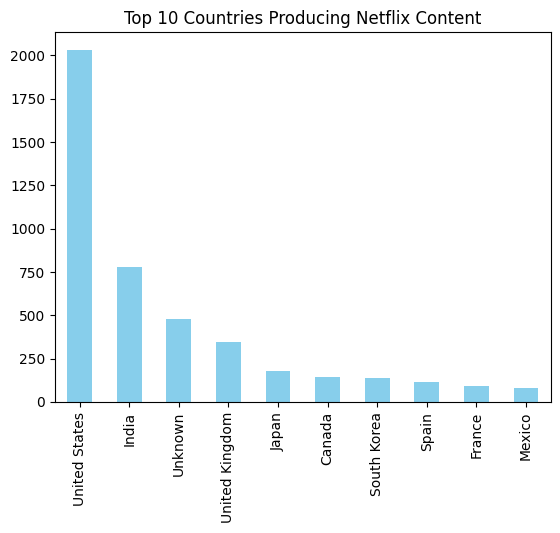

In [9]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries Producing Netflix Content")
